# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "DAE"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'DAE',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.359  1  0.701 0.403 0.004   
                             age        0.152  1  0.297 0.586 0.002   
                             Kiel       1.995  1  3.900 0.050 0.020   
                             Magdeburg  4.253  1  8.315 0.004 0.042   
                             Sweden     6.998  1 13.682 0.000 0.067   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.180  1  0.187 0.666 0.001   
                             age        1.034  1  1.073 0.302 0.006   
                             Kiel       0.019  1  0.020 0.887 0.000   
                             Magdeburg  1.751  1  1.818 0.179 0.009   
                             Sweden    21.390  1 22.212 0.000 0.104   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.394  0.563    False  
                             age               0.232  0.721    False  
                             Kiel              1.304  0.121    False  
                             Magdeburg         2.358  0.017     True  
                             Sweden            3.548  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.177  0.783    False  
                             age               0.521  0.463    False  
                             Kiel              0.052  0.938    False  
                             Magdeburg         0.747  0.321    False  
                             Sweden            5.328  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                     DAE                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         1.125  1  8.203 0.005 0.041   
                             age        0.008  1  0.061 0.806 0.000   
                             Kiel       0.270  1  1.970 0.162 0.010   
                             Magdeburg  0.421  1  3.072 0.081 0.016   
                             Sweden     1.563  1 11.394 0.001 0.056   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         2.695  1  4.857 0.029 0.025   
                             age        0.517  1  0.932 0.336 0.005   
                             Kiel       3.652  1  6.582 0.011 0.033   
                             Magdeburg  3.967  1  7.150 0.008 0.036   
                             Sweden    28.111  1 50.664 0.000 0.210   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.332  0.014     True  
                             age               0.094  0.872    False  
                             Kiel              0.790  0.265    False  
                             Magdeburg         1.090  0.153    False  
                             Sweden            3.049  0.003     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.542  0.065    False  
                             age               0.474  0.467    False  
                             Kiel              1.956  0.029     True  
                             Magdeburg         2.089  0.022     True  
                             Sweden           10.666  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                    DAE                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.005         2.332  0.014     True   
                             age       0.806         0.094  0.872    False   
                             Kiel      0.162         0.790  0.265    False   
                             Magdeburg 0.081         1.090  0.153    False   
                             Sweden    0.001         3.049  0.003     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.029         1.542  0.065    False   
                             age       0.336         0.474  0.467    False   
                             Kiel      0.011         1.956  0.029     True   
                             Magdeburg 0.008         2.089  0.022     True   
                             Sweden    0.000        10.666  0.000     True   

model                                     PI                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.403         0.394  0.563    False  
                             age       0.586         0.232  0.721    False  
                             Kiel      0.050         1.304  0.121    False  
                             Magdeburg 0.004         2.358  0.017     True  
                             Sweden    0.000         3.548  0.002     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.666         0.177  0.783    False  
                             age       0.302         0.521  0.463    False  
                             Kiel      0.887         0.052  0.938    False  
                             Magdeburg 0.179         0.747  0.321    False  
                             Sweden    0.000         5.328  0.000     True  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'DAE': 'DAE', 'PI': 'PI'}

## Describe scores

In [10]:
scores.describe()

model       DAE                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.224         3.338     0.278     0.260         2.485     0.337
std       0.294         6.439     0.321     0.303         5.346     0.331
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.000         0.407     0.002     0.004         0.339     0.015
50%       0.059         1.227     0.119     0.120         0.919     0.241
75%       0.392         3.350     0.523     0.458         2.435     0.611
max       1.000        86.910     1.000     0.999       148.755     0.999

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                       DAE                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.005         2.332   
A0A024R0T9;K7ER74;P02655                           AD     0.041         1.387   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.202         0.694   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.250         0.603   
A0A075B6H7                                         AD     0.011         1.955   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.307         0.513   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.832         0.080   
S4R3U6                                             AD     0.029         1.542   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.014     True   
A0A024R0T9;K7ER74;P02655                           AD      0.087    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.317    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.373    False   
A0A075B6H7                                         AD      0.029     True   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.283    False   
Q9Y6X5                                             AD      0.437    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.157    False   
Q9Y6Y9                                             AD      0.889    False   
S4R3U6                                             AD      0.065    False   

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.403         0.394   
A0A024R0T9;K7ER74;P02655                           AD     0.066         1.183   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.012         1.925   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.447         0.350   
A0A075B6H7                                         AD     0.213         0.671   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.054         1.269   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.171         0.766   
S4R3U6                                             AD     0.666         0.177   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.563    False  
A0A024R0T9;K7ER74;P02655                           AD      0.150    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.039     True  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.602    False  
A0A075B6H7                                         AD      0.364    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model       DAE                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.235         1.615     0.295     0.255         1.405     0.337
std       0.288         1.893     0.312     0.294         1.621     0.319
min       0.000         0.003     0.000     0.000         0.001     0.000
25%       0.007         0.379     0.020     0.012         0.356     0.040
50%       0.085         1.068     0.160     0.121         0.918     0.241
75%       0.417         2.160     0.549     0.441         1.916     0.597
max       0.993        25.292     0.995     0.998        21.038     0.999

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,DAE,PI
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,926,1033


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

DAE                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.005         2.332  0.014   
A0A024R0T9;K7ER74;P02655                           0.041         1.387  0.087   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.202         0.694  0.317   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.250         0.603  0.373   
A0A075B6H7                                         0.011         1.955  0.029   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.283   
Q9Y6X5                                             0.307         0.513  0.437   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.157   
Q9Y6Y9                                             0.832         0.080  0.889   
S4R3U6                                             0.029         1.542  0.065   

                                                               PI  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                           True 0.403   
A0A024R0T9;K7ER74;P02655                              False 0.066   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.012   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.447   
A0A075B6H7                                             True 0.213   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.054   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.171   
S4R3U6                                                False 0.666   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.394  0.563   
A0A024R0T9;K7ER74;P02655                                   1.183  0.150   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         1.925  0.039   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.350  0.602   
A0A075B6H7                                                 0.671  0.364   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.315   
Q9Y6X5                                                     1.269  0.128   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.181   
Q9Y6Y9                                                     0.766  0.310   
S4R3U6                                                     0.177  0.783   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...     True       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                              

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
DAE (no)  - PI (no)    866
DAE (yes) - PI (yes)   328
DAE (yes) - PI (no)    167
DAE (no)  - PI (yes)    60
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


DAE                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.005         2.332  0.014   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.202         0.694  0.317   
A0A075B6H7                                         0.011         1.955  0.029   
A0A075B6I0                                         0.001         3.173  0.003   
A0A075B6J9                                         0.015         1.838  0.037   
...                                                  ...           ...    ...   
Q9ULP0-3;Q9ULP0-6                                  0.000         3.320  0.002   
Q9UMX0;Q9UMX0-2;Q9UMX0-4                           0.055         1.261  0.111   
Q9UP79                                             0.000         4.473  0.000   
Q9UQ52                                             0.001         3.255  0.002   
Q9Y6C2                                             0.000         3.655  0.001   

                                                               PI  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                           True 0.403   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.012   
A0A075B6H7                                             True 0.213   
A0A075B6I0                                             True 0.024   
A0A075B6J9                                             True 0.042   
...                                                     ...   ...   
Q9ULP0-3;Q9ULP0-6                                      True 0.032   
Q9UMX0;Q9UMX0-2;Q9UMX0-4                              False 0.009   
Q9UP79                                                 True 0.331   
Q9UQ52                                                 True 0.099   
Q9Y6C2                                                 True 0.440   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.394  0.563   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         1.925  0.039   
A0A075B6H7                                                 0.671  0.364   
A0A075B6I0                                                 1.615  0.069   
A0A075B6J9                                                 1.373  0.106   
...                                                          ...    ...   
Q9ULP0-3;Q9ULP0-6                                          1.490  0.086   
Q9UMX0;Q9UMX0-2;Q9UMX0-4                                   2.024  0.032   
Q9UP79                                                     0.480  0.494   
Q9UQ52                                                     1.004  0.208   
Q9Y6C2                                                     0.357  0.596   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...     True       174  
A0A075B6H7                                            False        91  
A0A075B6I0                                            False       194  
A0A075B6J9                                            False       156  
...                                                     ...       ...  
Q9ULP0-3;Q9ULP0-6                                     False       136  
Q9UMX0;Q9UMX0-2;Q9UMX0-4                               True        57  
Q9UP79                                                False       135  
Q9UQ52                              

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,DAE,PI,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.014,0.563,186,DAE (yes) - PI (no)
A0A024R0T9;K7ER74;P02655,0.087,0.150,195,DAE (no) - PI (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.317,0.039,174,DAE (no) - PI (yes)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.373,0.602,196,DAE (no) - PI (no)
A0A075B6H7,0.029,0.364,91,DAE (yes) - PI (no)
...,...,...,...,...
Q9Y6R7,0.283,0.315,197,DAE (no) - PI (no)
Q9Y6X5,0.437,0.128,173,DAE (no) - PI (no)
Q9Y6Y8;Q9Y6Y8-2,0.157,0.181,197,DAE (no) - PI (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,DAE,PI,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
O60565,0.000,0.995,81,DAE (yes) - PI (no),0.995
D6RF35,0.008,0.984,57,DAE (yes) - PI (no),0.976
P51688,0.018,0.984,58,DAE (yes) - PI (no),0.966
P17931,0.017,0.954,174,DAE (yes) - PI (no),0.937
Q504Y2,0.008,0.936,96,DAE (yes) - PI (no),0.928
...,...,...,...,...,...
F5GY80;F5H7G1;P07358,0.046,0.057,197,DAE (yes) - PI (no),0.011
Q9NX62,0.045,0.055,197,DAE (yes) - PI (no),0.010
P00740;P00740-2,0.043,0.053,197,DAE (yes) - PI (no),0.010


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_comparision_1_DAE


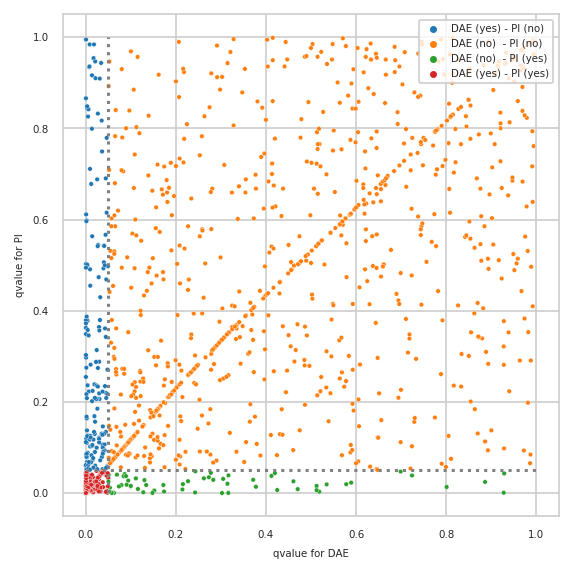

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_comparision_2_DAE


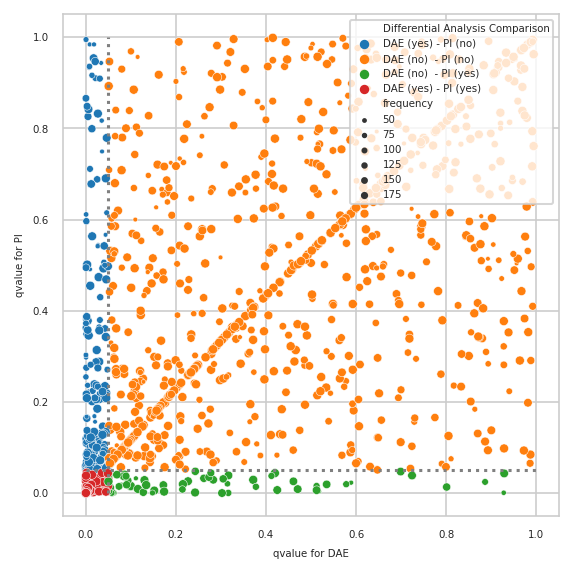

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

vaep.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
PSEN1,ENSP00000326366,5.000
APOE,ENSP00000252486,5.000
APP,ENSP00000284981,5.000
MAPT,ENSP00000340820,4.800
...,...,...
ZBTB22,ENSP00000407545,0.683
HMGN2,ENSP00000355228,0.683
PPP1R13B,ENSP00000202556,0.683


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out